In [1]:
import tensorflow as tf
import numpy as np
from PIL import Image
import cv2

In [2]:
## Load the saved model
model=tf.keras.models.load_model('my_model.h5')

In [97]:
image= cv2.imread(r"C:\Users\rakes\Skin_Cancer_detection\images\basal cell carcinoma\ISIC_0011677.jpg")
image=cv2.resize(image,(180,180))

1/1 [==============================] - 0s 32ms/step


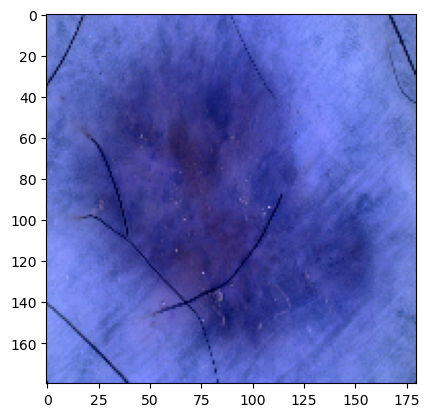

The predicted class is: basal cell carcinoma


In [98]:
import matplotlib.pyplot as plt
# Convert the image to a NumPy array
image_array = tf.keras.preprocessing.image.img_to_array(image)

# Normalize the pixel values
#image_array = image_array / 100.0
# Rescale the pixel values to [0, 1]
rescaling_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1.)
image_array = rescaling_layer(image_array)

# Add a batch dimension
image_array = np.expand_dims(image_array, axis=0)

# Make the prediction
prediction = model.predict(image_array)

# Convert the prediction to a class label
class_names = ['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']
predicted_class_index = np.argmax(prediction)
predicted_class_name = class_names[predicted_class_index]
plt.imshow(image)
plt.show()
print('The predicted class is:', predicted_class_name)